In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 63% 35.0M/55.6M [00:00<00:00, 157MB/s] 
100% 55.6M/55.6M [00:00<00:00, 171MB/s]


In [ ]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/medical-image-dataset-brain-tumor-detection.zip')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

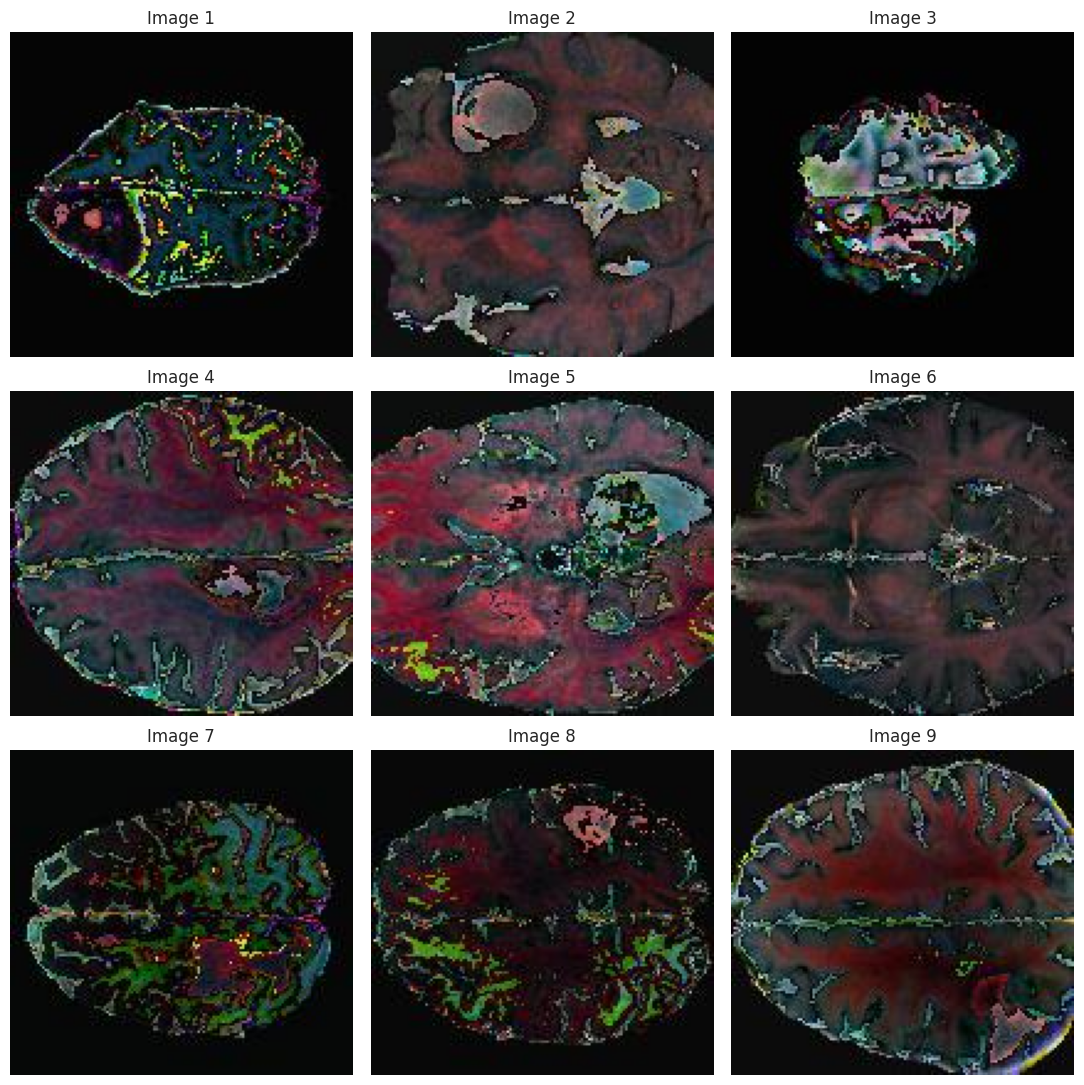

In [ ]:
Image_dir = '/content/Brain Tumor Detection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image = cv2.imread("/content/Brain Tumor Detection/train/images/volume_100_slice_100_jpg.rf.ac33e0ac3a1eebeb5e262e8a6f7de5d9.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 139x132 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 82.0MB/s]



image 1/1 /content/Brain Tumor Detection/train/images/volume_100_slice_100_jpg.rf.ac33e0ac3a1eebeb5e262e8a6f7de5d9.jpg: 416x416 (no detections), 10.4ms
Speed: 13.5ms preprocess, 10.4ms inference, 107.6ms postprocess per image at shape (1, 3, 416, 416)


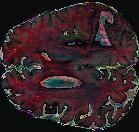

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/Brain Tumor Detection/train/images/volume_100_slice_100_jpg.rf.ac33e0ac3a1eebeb5e262e8a6f7de5d9.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/Brain Tumor Detection/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Brain Tumor Detection/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Brain Tumor Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:03<00:00, 2121.98it/s]


train: New cache created: /content/Brain Tumor Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 888.70it/s]


val: New cache created: /content/Brain Tumor Detection/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.8G      1.859       3.21       1.79         68        416: 100%|██████████| 109/109 [01:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.05it/s]


                   all       1980       4380      0.501      0.305      0.328       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.76G      1.686      2.087      1.603         71        416: 100%|██████████| 109/109 [01:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]


                   all       1980       4380      0.388      0.349      0.297      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.77G      1.732      1.993       1.63         71        416: 100%|██████████| 109/109 [01:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]


                   all       1980       4380      0.313      0.308      0.236     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.77G      1.783      1.959       1.66         83        416: 100%|██████████| 109/109 [01:06<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]


                   all       1980       4380      0.349      0.288      0.232     0.0829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.77G       1.73      1.802      1.622         71        416: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


                   all       1980       4380      0.477      0.349       0.35      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.77G      1.713      1.732      1.596         82        416: 100%|██████████| 109/109 [01:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]


                   all       1980       4380      0.502      0.343      0.342      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.76G      1.699      1.661      1.587         79        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]


                   all       1980       4380      0.548      0.448      0.458      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.76G      1.671      1.603      1.578         83        416: 100%|██████████| 109/109 [01:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]


                   all       1980       4380      0.686      0.537      0.586      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.79G      1.648      1.566      1.562         59        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]


                   all       1980       4380       0.73      0.516      0.575      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.76G      1.638       1.52      1.554         82        416: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.50it/s]

                   all       1980       4380      0.688      0.504      0.552      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.78G      1.637      1.518      1.553         56        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]


                   all       1980       4380      0.707      0.553      0.599      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.76G      1.612      1.461      1.535         70        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]


                   all       1980       4380      0.732      0.534      0.606       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.76G      1.606      1.429      1.523         76        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.61it/s]


                   all       1980       4380      0.685      0.473      0.535      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.79G      1.584      1.397      1.511         63        416: 100%|██████████| 109/109 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]

                   all       1980       4380      0.751      0.547      0.613      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.76G      1.565      1.372      1.498         79        416: 100%|██████████| 109/109 [01:03<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]


                   all       1980       4380      0.769      0.562      0.632      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.76G      1.561      1.356      1.492         52        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.43it/s]


                   all       1980       4380      0.721      0.518      0.579      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.75G       1.54      1.336      1.482         87        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]

                   all       1980       4380      0.768      0.566      0.636      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.76G      1.546      1.321      1.475         57        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]


                   all       1980       4380      0.792      0.571      0.649      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.75G       1.54      1.307      1.477         51        416: 100%|██████████| 109/109 [01:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.44it/s]


                   all       1980       4380      0.767      0.566      0.628       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.75G      1.525      1.286      1.463         79        416: 100%|██████████| 109/109 [01:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]


                   all       1980       4380      0.761      0.554      0.625      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.76G       1.51      1.271      1.458         75        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]


                   all       1980       4380      0.723      0.531      0.589      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.79G      1.499      1.262      1.445         82        416: 100%|██████████| 109/109 [01:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


                   all       1980       4380      0.796      0.613      0.678      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.76G      1.497      1.233      1.441         61        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]

                   all       1980       4380      0.786      0.613      0.679      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.76G      1.489      1.235      1.443         79        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.65it/s]


                   all       1980       4380        0.8      0.597      0.671      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.76G      1.478      1.218      1.428         58        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all       1980       4380       0.81      0.622      0.688      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.76G       1.47      1.207      1.424         63        416: 100%|██████████| 109/109 [01:03<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.48it/s]


                   all       1980       4380      0.791      0.598      0.673      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.78G      1.458      1.195       1.42         87        416: 100%|██████████| 109/109 [00:58<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.811      0.615      0.689      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.79G      1.458      1.188      1.414         61        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]

                   all       1980       4380       0.81      0.602      0.677      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.79G      1.443      1.172       1.41         59        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.802      0.627      0.695      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.79G      1.443      1.167      1.409         47        416: 100%|██████████| 109/109 [00:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]

                   all       1980       4380      0.814      0.626      0.696      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.79G      1.428      1.145      1.399         74        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


                   all       1980       4380       0.84      0.618      0.697      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.75G      1.425      1.135      1.397         57        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]

                   all       1980       4380      0.818      0.629      0.704      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.75G      1.417      1.139      1.398         74        416: 100%|██████████| 109/109 [01:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]

                   all       1980       4380      0.839      0.631      0.707      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.76G      1.417      1.125      1.389         73        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.67it/s]

                   all       1980       4380      0.832      0.623      0.708      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.76G      1.407      1.105      1.386         61        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.821      0.614      0.697      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.75G      1.395       1.11      1.378         72        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]


                   all       1980       4380       0.84      0.641      0.721      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.79G       1.39      1.086      1.371         86        416: 100%|██████████| 109/109 [01:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.45it/s]

                   all       1980       4380      0.826      0.636      0.713       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.75G      1.387      1.094      1.373         53        416: 100%|██████████| 109/109 [01:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.34it/s]

                   all       1980       4380      0.854      0.645      0.725      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.79G      1.379      1.079      1.365         59        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.23it/s]

                   all       1980       4380      0.838      0.652      0.725      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.76G      1.363      1.063      1.358         60        416: 100%|██████████| 109/109 [01:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]


                   all       1980       4380      0.833      0.632      0.714      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.76G      1.369      1.069      1.357         73        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.65it/s]

                   all       1980       4380      0.851      0.645      0.725      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.76G      1.363      1.059      1.352         96        416: 100%|██████████| 109/109 [01:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]

                   all       1980       4380      0.843      0.646      0.727      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.78G      1.354      1.048      1.346         67        416: 100%|██████████| 109/109 [01:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]


                   all       1980       4380      0.847      0.661      0.736      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.75G      1.348      1.032      1.342         74        416: 100%|██████████| 109/109 [01:00<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.35it/s]

                   all       1980       4380      0.862      0.642      0.736      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.75G      1.335      1.039      1.336         67        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]

                   all       1980       4380      0.834      0.664      0.739      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.79G       1.33      1.027      1.332         75        416: 100%|██████████| 109/109 [01:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]


                   all       1980       4380       0.86      0.654      0.736      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.75G      1.332      1.012      1.336         67        416: 100%|██████████| 109/109 [01:00<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]

                   all       1980       4380      0.864       0.65      0.737      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.76G      1.326      1.014      1.327         54        416: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


                   all       1980       4380      0.868      0.643      0.733      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.75G      1.317      1.009      1.328         76        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

                   all       1980       4380       0.85      0.662      0.744      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.76G      1.324      1.006      1.324         60        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.31it/s]

                   all       1980       4380      0.875      0.666       0.75      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.75G      1.302       0.98      1.317         87        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.47it/s]


                   all       1980       4380      0.859       0.67      0.751      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.75G      1.294     0.9699      1.309         58        416: 100%|██████████| 109/109 [00:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]

                   all       1980       4380      0.873      0.657       0.75      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.75G      1.301     0.9849      1.317         72        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]

                   all       1980       4380       0.86       0.67      0.754      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.76G      1.285     0.9805      1.308         68        416: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all       1980       4380      0.863      0.664      0.752      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.78G      1.271     0.9566      1.305         91        416: 100%|██████████| 109/109 [01:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all       1980       4380      0.855      0.685      0.756      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.76G       1.28     0.9618      1.302         73        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]

                   all       1980       4380      0.856      0.671      0.754       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.76G       1.27       0.96      1.298         53        416: 100%|██████████| 109/109 [01:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]

                   all       1980       4380      0.858      0.679      0.756      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.75G      1.274     0.9489      1.296         52        416: 100%|██████████| 109/109 [01:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]

                   all       1980       4380      0.869      0.685      0.765      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.79G      1.259     0.9383      1.286         79        416: 100%|██████████| 109/109 [01:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.887      0.666      0.761      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.76G      1.247     0.9251      1.284         76        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.50it/s]


                   all       1980       4380      0.872      0.683      0.767      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.75G      1.246     0.9273      1.282         72        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]

                   all       1980       4380      0.866      0.681      0.767      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.76G      1.251      0.925      1.283         84        416: 100%|██████████| 109/109 [01:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all       1980       4380      0.866      0.689      0.768      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.75G      1.242     0.9153       1.28         70        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]


                   all       1980       4380      0.867      0.692      0.771      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.75G      1.236     0.9119      1.276         58        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.64it/s]

                   all       1980       4380      0.869      0.685      0.769      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.75G      1.225     0.9047      1.273         53        416: 100%|██████████| 109/109 [01:00<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]

                   all       1980       4380      0.874      0.695      0.773      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.75G      1.222     0.8976       1.27         61        416: 100%|██████████| 109/109 [01:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all       1980       4380      0.874      0.691      0.771      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.78G      1.215     0.8958      1.264         59        416: 100%|██████████| 109/109 [00:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]

                   all       1980       4380      0.885      0.687      0.771      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.79G      1.211     0.8906      1.257         78        416: 100%|██████████| 109/109 [01:01<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.23it/s]

                   all       1980       4380      0.876      0.684      0.774       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.79G      1.204     0.8782       1.26         73        416: 100%|██████████| 109/109 [01:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.54it/s]

                   all       1980       4380      0.887      0.691      0.778      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.79G      1.197      0.871      1.254         68        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]

                   all       1980       4380      0.871      0.696      0.776      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.76G        1.2      0.871      1.254         76        416: 100%|██████████| 109/109 [01:01<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]

                   all       1980       4380      0.877      0.704       0.78      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.75G      1.202     0.8771       1.25         74        416: 100%|██████████| 109/109 [01:00<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.64it/s]

                   all       1980       4380      0.883      0.702      0.782      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.78G      1.187     0.8608      1.247         75        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]

                   all       1980       4380       0.89      0.692      0.782      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.75G      1.187     0.8603       1.25         96        416: 100%|██████████| 109/109 [00:59<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all       1980       4380      0.885      0.702      0.784        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.75G       1.18     0.8559      1.239         54        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all       1980       4380      0.893      0.699      0.782      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.76G      1.172     0.8432      1.239         74        416: 100%|██████████| 109/109 [01:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all       1980       4380      0.888      0.706      0.785      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.78G      1.167     0.8438      1.235         54        416: 100%|██████████| 109/109 [01:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]

                   all       1980       4380      0.892      0.694      0.784      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.75G      1.148     0.8207      1.227         59        416: 100%|██████████| 109/109 [01:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]


                   all       1980       4380      0.891      0.701      0.785      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.75G      1.155     0.8274       1.23         70        416: 100%|██████████| 109/109 [01:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.887      0.701      0.786      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.78G      1.156       0.83      1.228         62        416: 100%|██████████| 109/109 [01:07<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.23it/s]

                   all       1980       4380      0.894      0.702      0.786      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.75G      1.154     0.8255      1.227         75        416: 100%|██████████| 109/109 [01:03<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]

                   all       1980       4380      0.908       0.69      0.785      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.78G      1.143      0.818      1.226         74        416: 100%|██████████| 109/109 [01:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.59it/s]

                   all       1980       4380      0.898      0.698      0.786       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.78G      1.136     0.8193      1.217         64        416: 100%|██████████| 109/109 [01:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]

                   all       1980       4380      0.888      0.706      0.788      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.76G      1.137     0.8123      1.216         53        416: 100%|██████████| 109/109 [01:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all       1980       4380      0.891      0.707      0.789      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.76G      1.125     0.8014      1.211         83        416: 100%|██████████| 109/109 [01:03<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]

                   all       1980       4380      0.902      0.704      0.791      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.76G      1.121     0.7947      1.211         68        416: 100%|██████████| 109/109 [01:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all       1980       4380      0.911      0.701      0.792      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.75G      1.115     0.7975      1.207         62        416: 100%|██████████| 109/109 [01:03<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]

                   all       1980       4380      0.908      0.705      0.793      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.76G      1.117     0.7917      1.206         78        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.45it/s]

                   all       1980       4380      0.899      0.706      0.791      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.78G       1.11     0.7836      1.205         62        416: 100%|██████████| 109/109 [00:59<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380      0.904      0.704      0.791      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.78G      1.114     0.7866      1.209         63        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]

                   all       1980       4380      0.899      0.705      0.793      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.72G      1.045     0.6668      1.195         44        416: 100%|██████████| 109/109 [01:05<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.62it/s]

                   all       1980       4380      0.894      0.713      0.793      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.72G      1.019     0.6481       1.18         44        416: 100%|██████████| 109/109 [00:57<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all       1980       4380       0.89      0.715      0.793      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.72G      1.007     0.6359      1.174         32        416: 100%|██████████| 109/109 [00:56<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.66it/s]

                   all       1980       4380      0.895      0.716      0.795      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.72G     0.9994     0.6311      1.167         41        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.27s/it]

                   all       1980       4380       0.89      0.717      0.795       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.72G     0.9931      0.627      1.164         48        416: 100%|██████████| 109/109 [00:56<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]

                   all       1980       4380      0.898      0.716      0.797      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.72G     0.9814     0.6227      1.162         38        416: 100%|██████████| 109/109 [00:56<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]

                   all       1980       4380      0.902      0.715      0.797      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.72G      0.974     0.6147       1.15         38        416: 100%|██████████| 109/109 [00:57<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

                   all       1980       4380        0.9      0.715      0.797      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.72G     0.9656     0.6073       1.15         41        416: 100%|██████████| 109/109 [01:00<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all       1980       4380      0.899      0.716      0.797      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.72G     0.9643     0.6066      1.148         41        416: 100%|██████████| 109/109 [00:58<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all       1980       4380      0.898      0.719      0.798      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.72G     0.9632     0.6017       1.15         38        416: 100%|██████████| 109/109 [00:55<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]

                   all       1980       4380      0.898      0.719      0.798      0.524



100 epochs completed in 2.075 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]


                   all       1980       4380      0.897      0.719      0.797      0.524
                label0       1246       1246       0.86      0.645      0.739      0.444
                label1       1944       1944      0.923      0.815      0.872      0.636
                label2       1190       1190      0.908      0.696       0.78      0.492
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

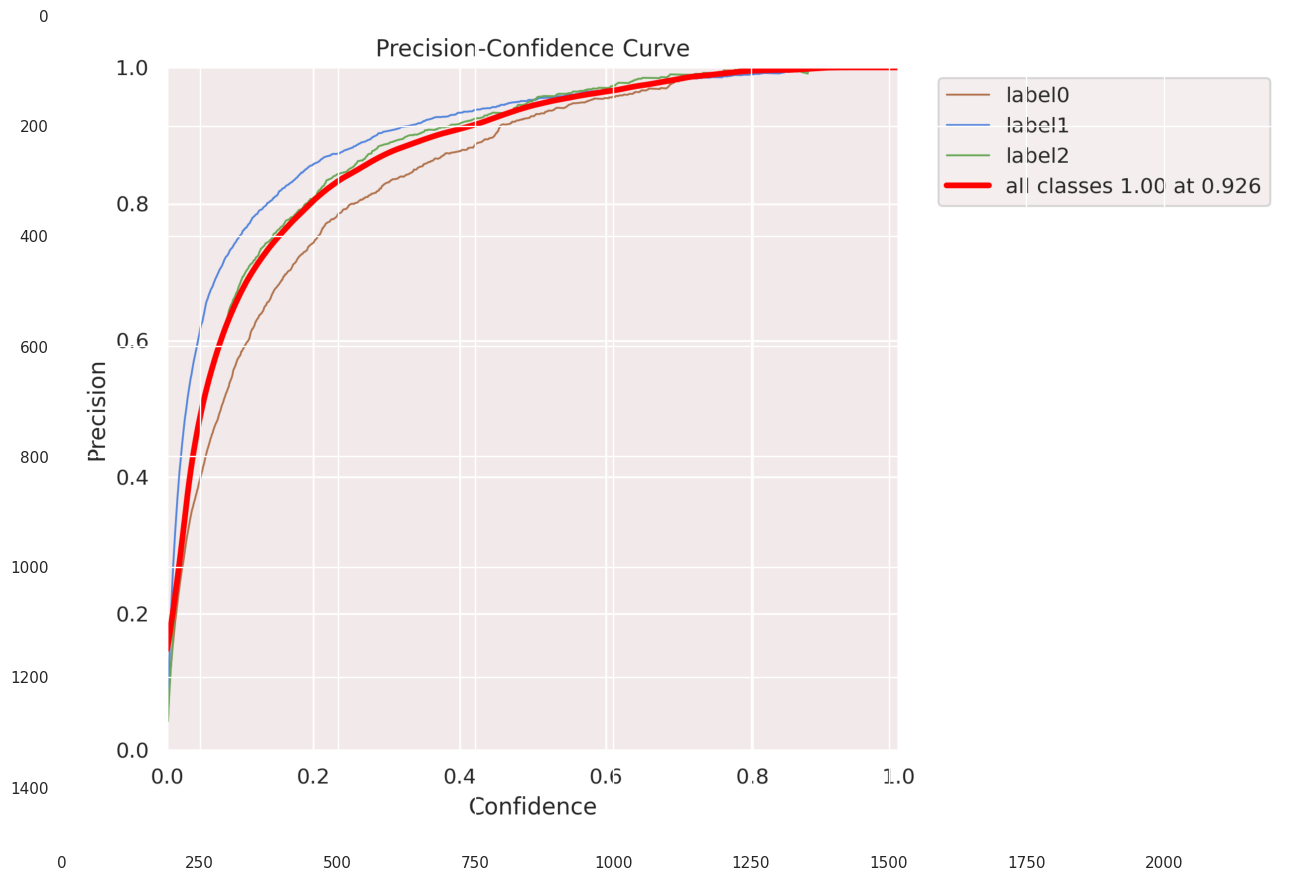

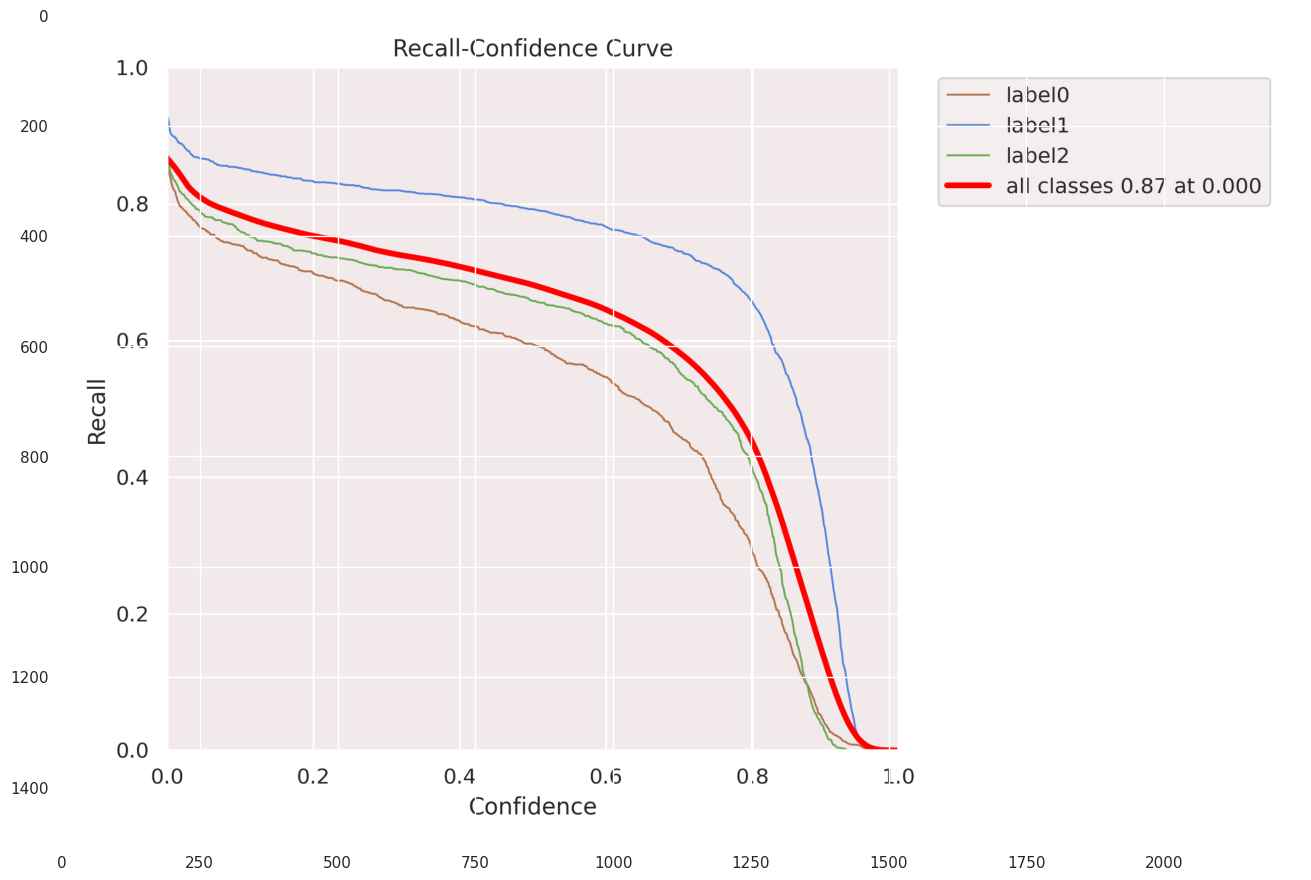

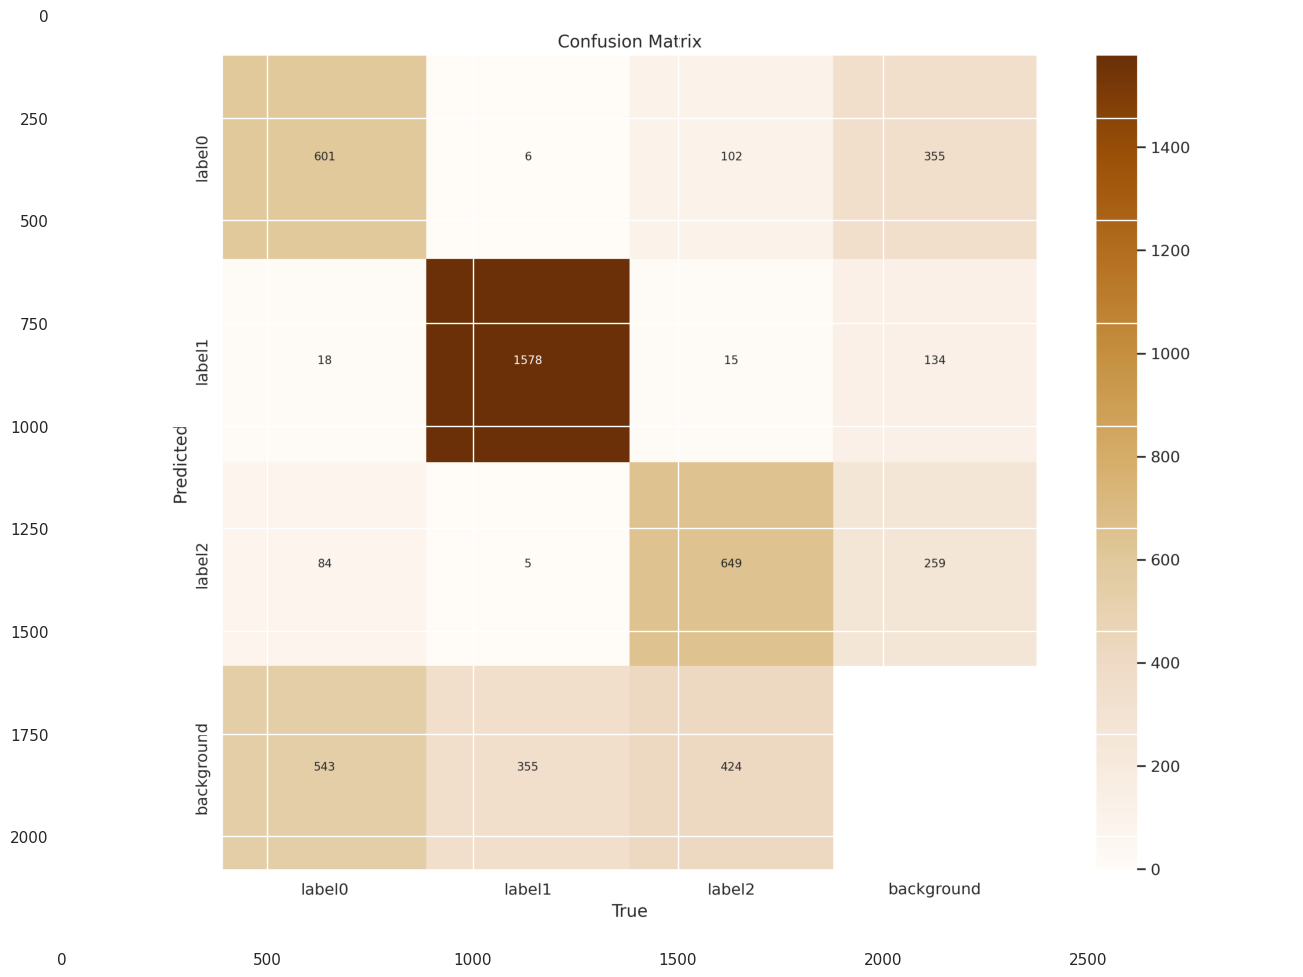

In [ ]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  1.04490                  0.66679   
91                       92                  1.01910                  0.64808   
92                       93                  1.00700                  0.63594   
93                       94                  0.99937                  0.63113   
94                       95                  0.99311                  0.62701   
95                       96                  0.98137                  0.62274   
96                       97                  0.97396                  0.61466   
97                       98                  0.96556                  0.60732   
98                       99                  0.96426                  0.60663   
99                      100                  0.96320                  0.60171   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                   1.1949                  0.89413                  0.71336   
91                   1.1799                  0.89019                  0.71450   
92                   1.1742                  0.89543                  0.71559   
93                   1.1670                  0.89031                  0.71740   
94                   1.1638                  0.89769                  0.71636   
95                   1.1619                  0.90162                  0.71519   
96                   1.1500                  0.89972                  0.71496   
97                   1.1499                  0.89892                  0.71580   
98                   1.1483                  0.89765                  0.71864   
99                   1.1497                  0.89779                  0.71883   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.79318                  0.51751                   1.2416   
91                  0.79302                  0.51843                   1.2394   
92                  0.79486                  0.51772                   1.2412   
93                  0.79500                  0.51984                   1.2380   
94                  0.79714                  0.52089                   1.2350   
95                  0.79722                  0.52291                   1.2318   
96                  0.79706                  0.52259                   1.2299   
97                  0.79744                  0.52409                   1.2284   
98                  0.79771                  0.52452                   1.2266   
99                  0.79799                  0.52427                   1.2248   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.72190                   1.2833                 0.001090   
91                  0.71858                   1.2825                 0.000991   
92                  0.71599                   1.2836                 0.000892   
93                  0.71651                   1.2802                 0.000793   
94                  0.71391                   1.2783                 0.000694   
95                  0.71061                   1.2772                 0.000595   
96                  0.70904                   1.2771                 0.000496   
97                  0.70880                   1.2767                 0.000397   
98                  0.70609                   1.2769                 0.000298   
99                  0.70433                   1.2762                 0.000199   

                     lr/pg1                   lr/pg2  
90                 0.001090                 0.001090  
91                 0.000991                 0.000991  
92                 0.000892                 0.000892  
93                 0.000793                 0.000793  
94                 0.000694                 0.000694  
95                 0.000595                 0.000595  
96                 0.000496                 0.000496  
97            

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Brain Tumor Detection/test/labels... 990 images, 17 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<00:00, 999.73it/s] 


val: New cache created: /content/Brain Tumor Detection/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:11<00:00,  5.21it/s]


                   all        990       2104      0.884      0.711      0.799      0.518
                label0        588        588      0.836       0.64       0.74      0.435
                label1        962        962      0.918      0.811      0.861      0.621
                label2        554        554        0.9      0.681      0.796      0.498
Speed: 0.2ms preprocess, 2.8ms inference, 0.1ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val


In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.8844618097002415
metrics/recall(B):  0.7106256832740298
metrics/mAP50(B):  0.7993077486188515
metrics/mAP50-95(B):  0.5178161640725099


In [ ]:
# Path to the directory containing the images
image_dir = '/content/Brain Tumor Detection/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 (no detections), 9.0ms
Speed: 3.4ms preprocess, 9.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 label1, 27.4ms
Speed: 1.3ms preprocess, 27.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 label0, 1 label1, 10.8ms
Speed: 1.3ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 label0, 1 label1, 1 label2, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 label1, 9.9ms
Speed: 1.3ms preprocess, 9.9ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 label1, 8.9ms
Speed: 1.3ms preprocess, 8.9ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/trai

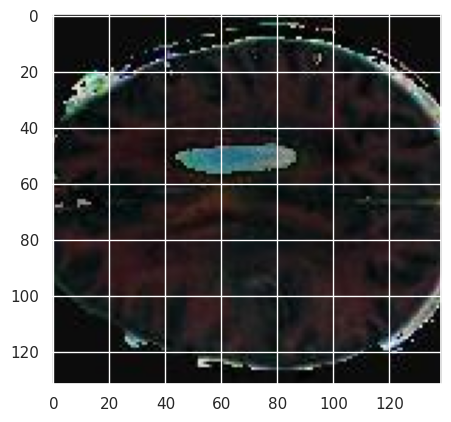

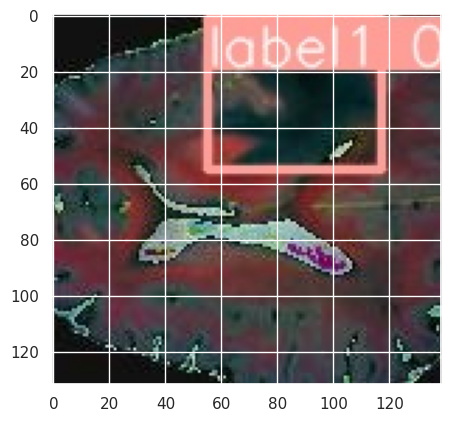

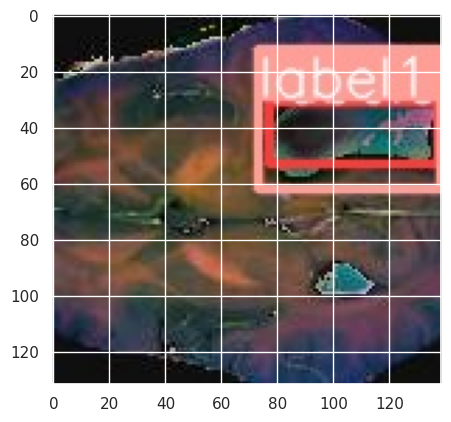

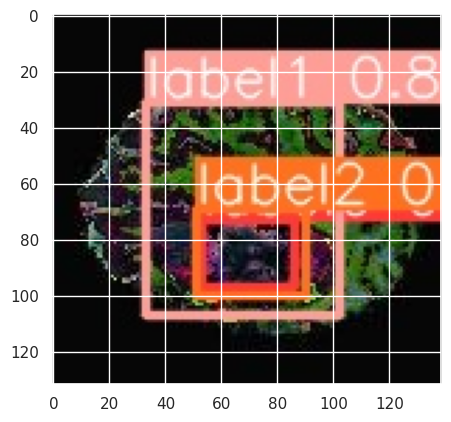

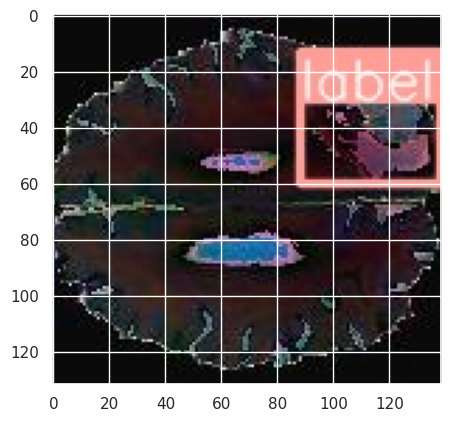

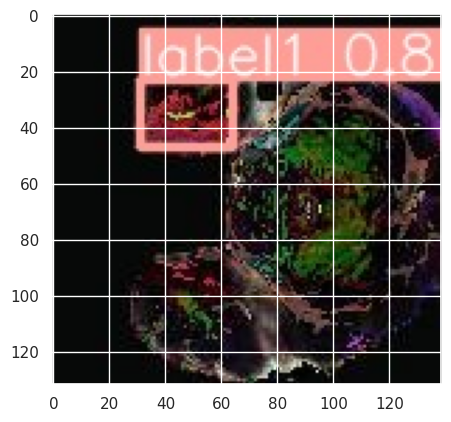

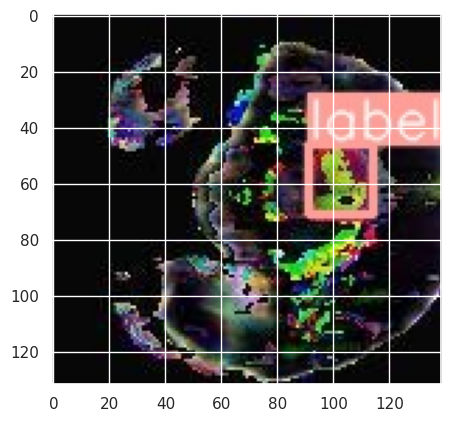

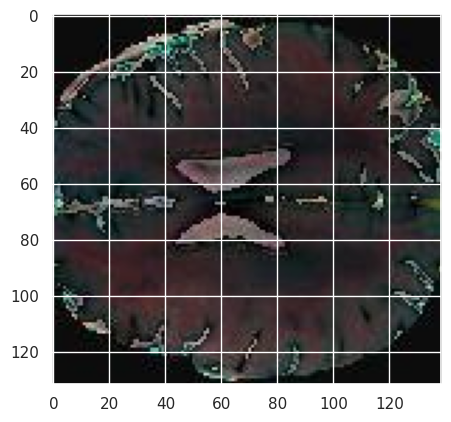

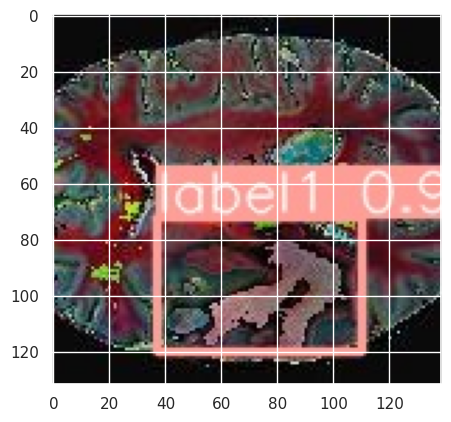

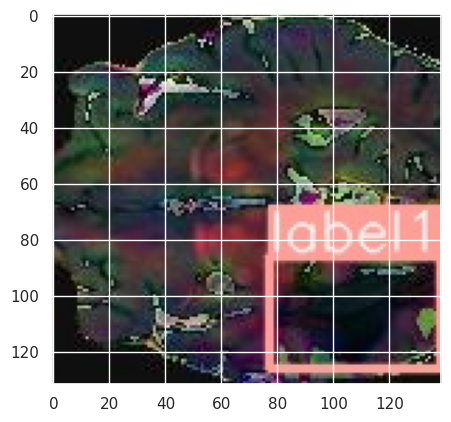

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [ ]:
import shutil
import os

# Define the folder you want to zip
folder_to_zip = '/content/runs'

# Define the output zip file path
output_filename = '/content/drive/MyDrive/BrainTumor'

# Create the zip file
shutil.make_archive(output_filename, 'zip', folder_to_zip)


'/content/drive/MyDrive/BrainTumor.zip'

In [ ]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/BrainTumor.zip')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
# Load the local YOLOv8 model
model = YOLO('/content/detect/train/weights/best.pt')

In [ ]:
import cv2

# Path to the video file
video_path = '/content/clideo_editor_3dff1536e5d0428c99f19e0ac78b55d1.mp4'
output_path = '/content/drive/MyDrive/Colab Notebooks/Output.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make prediction on the frame
    results = model.predict(frame, imgsz=416, conf=0.5, iou=0.7)  # Adjust as necessary

    # Draw the bounding boxes and labels on the frame
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f'{model.names[cls]} {conf:.2f}'
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the frame with predictions
    out.write(frame)

cap.release()
out.release()

print("Video processing complete. Saved to:", output_path)



0: 256x416 1 label1, 1 label2, 113.3ms
Speed: 13.7ms preprocess, 113.3ms inference, 844.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 10.4ms
Speed: 3.6ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 14.1ms
Speed: 1.7ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 1 label1, 1 label2, 8.6ms
Speed: 1.9m